5/4/22     



                                              Final Project 
                      
                                               Parker Lewis 

                Function to solve mass-spring damper system using RK4 method 









In [24]:
#Runge_Kutta Function 
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 


# function to solve second order ODEs
F_m = lambda t: 0 #Force Value over a mass; Test Case when F = 0 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w*v)-(pow(w,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - w^2*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt




                                            Overdamped Case:  c > c_c

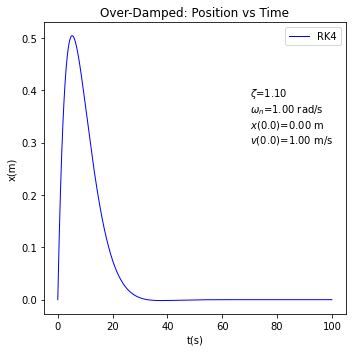

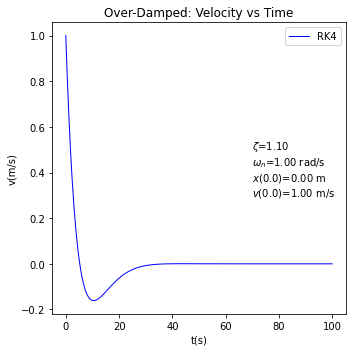

In [49]:
#Runge_Kutta Function Overdamped Case
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta values that correspond to Overdamped case
zeta = 1.1
w_n = 1. # rad/s

# function to solve second order ODEs
F_m = 0. #Force Value over a mass; Test Case when F = 0 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 0. #initial x(m)
v_i = 1. #initial v(m/s)
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.3
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Over-Damped: Position vs Time")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.3
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Over-Damped: Velocity vs Time")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()


    
    






                                                  Under damped Case: 
                                                       c < c_c
                                                       zeta < 1 
                                                              

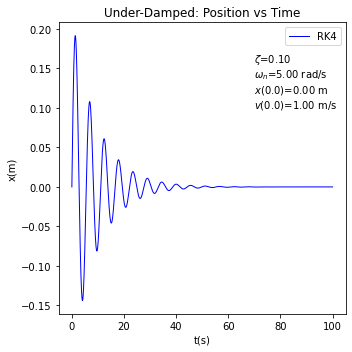

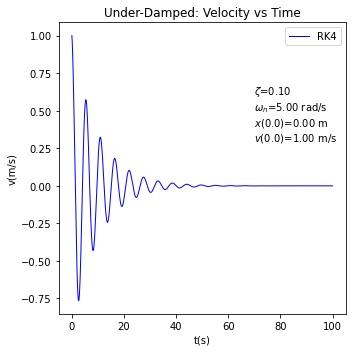

In [75]:
#Runge_Kutta Function Underdamped Case
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta values that correspond to underdamped case
zeta = 0.1
w_n = 5.0  # rad/s

# function to solve second order ODEs
F_m = 0. #Force Value over a mass; Test Case when F = 0 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 0. #initial  x
v_i = 1. #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions




# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.1
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Under-Damped: Position vs Time")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.3
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Under-Damped: Velocity vs Time")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()
    


                                      Critically damped case:
                                            c = c_c 
                                                                 
                                                                    
                                               
                                             

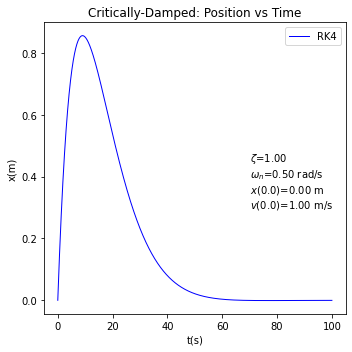

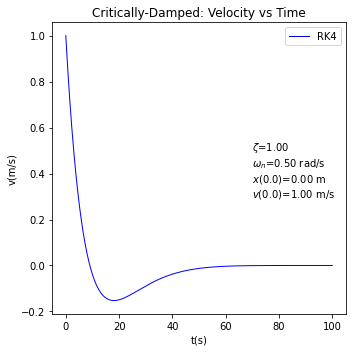

In [54]:
#Runge_Kutta Function Critically damped Case
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta values that correspond to Critically damped case
zeta = 1.
w_n = 0.5 # rad/s

# function to solve second order ODEs
F_m = 0. #Force Value over a mass; Test Case when F = 0 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 0. #initial  x
v_i = 1. #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.3
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Critically-Damped: Position vs Time")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.3
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Critically-Damped: Velocity vs Time")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()


                                               Forced Case 1: F = 5 

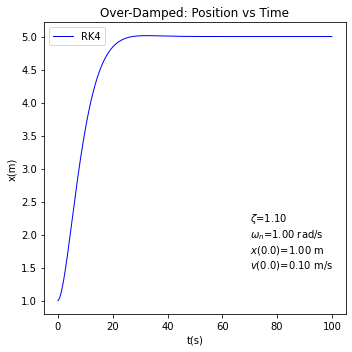

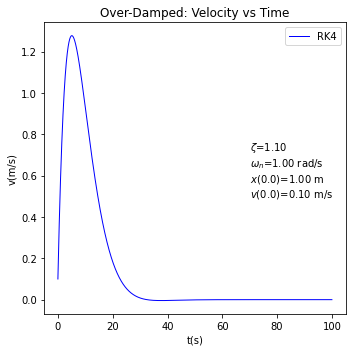

In [58]:
#Runge_Kutta Function Overdamped Case
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta values that correspond to Overdamped case
zeta = 1.1
w_n = 1. # rad/s

# function to solve second order ODEs
F_m = 5.0 #Force Value over a mass; Test Case when F = 5 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 1.0 #initial  x
v_i = .1 #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 1.5
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Over-Damped: Position vs Time")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.5
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Over-Damped: Velocity vs Time")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()
    
    


                                     Forced Case 2: F = 5t 

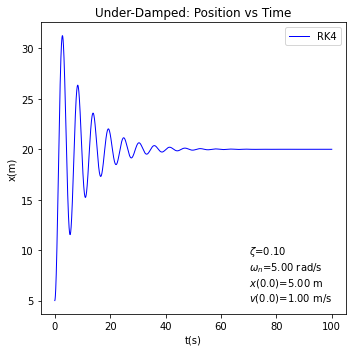

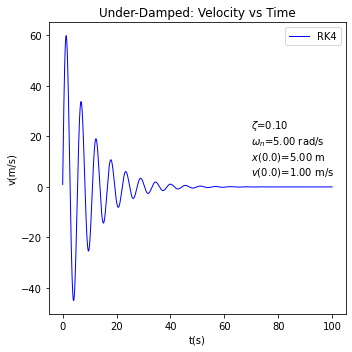

In [62]:
#Runge_Kutta Function Underdamped Case
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta values that correspond to underdamped case
zeta = 0.1
w_n = 5.0  # rad/s

# function to solve second order ODEs
F_m = 5*t_RK4[i] #Force Value over a mass; Test Case when F = 5t 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 5.0 #initial  x
v_i = 1.0 #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 5
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Under-Damped: Position vs Time")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 5
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Under-Damped: Velocity vs Time")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()


                                      Forced Case 3:  F = 5t^2 + 5t

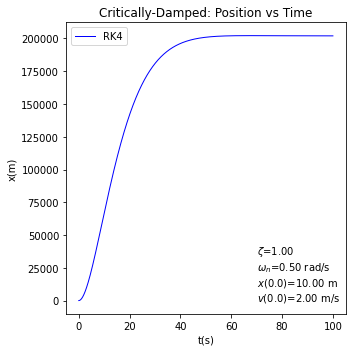

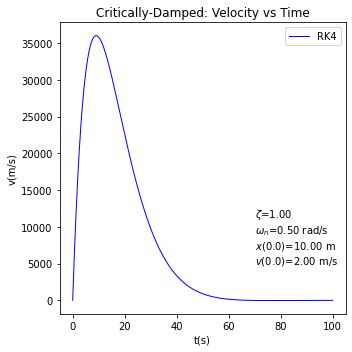

In [66]:
#Runge_Kutta Function Critically damped Case
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta values that correspond to Critically damped case
zeta = 1.0
w_n = 0.5 # rad/s

# function to solve second order ODEs
F_m = 5*pow(t_RK4[i],2)+ 5*t_RK4[i] #Force Value over a mass; Test Case when F = 5t^2+5t 
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 10.0 #initial  x
v_i = 2.0 #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 0.3
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Critically-Damped: Position vs Time")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 5000
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f"Critically-Damped: Velocity vs Time")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()


                                      Forced Case: F = Acos(w_f*t)

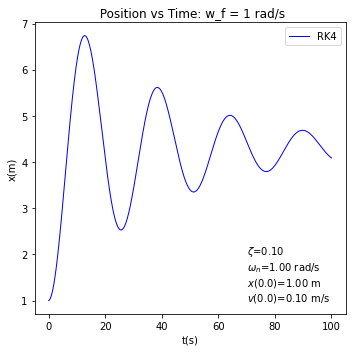

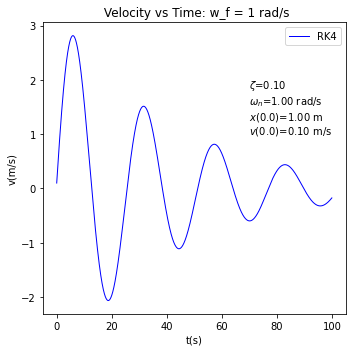

In [71]:
#Runge_Kutta Function for sinusoidal wave
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta and Amplitude values that correspond to sinusoidal case
A = 5
zeta = 0.1
w_n = 1.0 # rad/s

# function to solve second order ODEs
F_m = 5*cos(w_n*t_RK4[i]) #Force Value over a mass; Test Case when F = 5cos(t)
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 1.0 #initial  x
v_i = .1 #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 1
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f" Position vs Time: w_f = 1 rad/s")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 1
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f" Velocity vs Time: w_f = 1 rad/s")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()

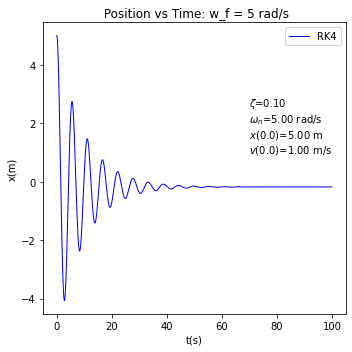

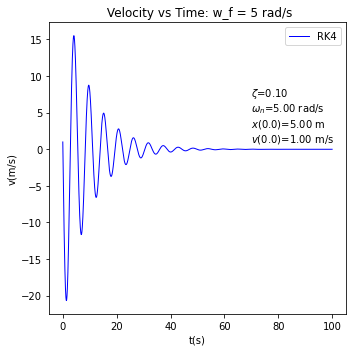

In [72]:
#Runge_Kutta Function for sinusoidal wave
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta and Amplitude values that correspond to sinusoidal case
A = 5
zeta = 0.1
w_n = 5.0 # rad/s

# function to solve second order ODEs
F_m = 5*cos(w_n*t_RK4[i]) #Force Value over a mass; Test Case when F = 5cos(5t)
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 5.0 #initial  x
v_i = 1.0 #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions






# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 1
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f" Position vs Time: w_f = 5 rad/s")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 1
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f" Velocity vs Time: w_f = 5 rad/s")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()

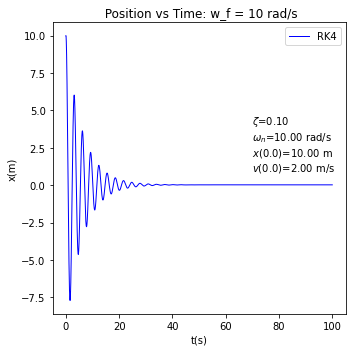

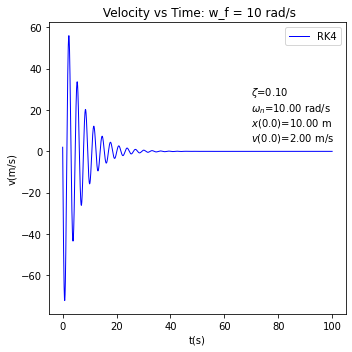

In [74]:
#Runge_Kutta Function for sinusoidal wave
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 



#Omega and zeta and Amplitude values that correspond to sinusoidal case
A = 5
zeta = 0.1
w_n = 10.0 # rad/s

# function to solve second order ODEs
F_m = 5*cos(w_n*t_RK4[i]) #Force Value over a mass; Test Case when F = 5cos(10t)
f_x = lambda t,x,v: v #velocity; dx/dt 
f_v = lambda t,x,v: F_m-(2*zeta*w_n*v)-(pow(w_n,2)*x) 
#function to solve dv/dt = F/m - 2*zeta*w*v - (w^2)*x

def Rk4_v(ti,xi,vi,dt):
    K1 = f_v(ti,xi,vi)
    K2 = f_v(ti+a2*dt,xi,vi+b21*K1*dt)
    K3 = f_v(ti+a3*dt,xi,vi+b31*K1*dt+b32*K2*dt)
    K4 = f_v(ti+a4*dt,xi,vi+b41*K1+b42*K2+b43*K2)
    vi_1 = vi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return vi_1
#Function for the numerical solution of dv/dt

def Rk4_x(ti,xi,vi,dt):
    K1 = f_x(ti,xi,vi)
    K2 = f_x(ti+a2*dt,xi+b21*K1*dt,vi)
    K3 = f_x(ti+a3*dt,xi+b31*K1*dt+b32*K2*dt,vi)
    K4 = f_x(ti+a4*dt,xi+b41*K1+b42*K2+b43*K2,vi)
    xi_1 = xi + (c1*K1+c2*K2+c3*K3+c4*K4)*dt
    return xi_1
#Function for the numerical solution of dx/dt


#RK4 Constants 
c1 = 1./6
c2 = 2./6
c3 = 2./6
c4 = 1./6
a2 = 1./2
a3 = 1./2
a4 = 1.
b21 = 1./2
b31 = 0.
b32 = 1./2
b41 = 0.
b42 = 0.
b43 = 1.


#initial values for each variable set
t_RK4 = np.arange(0,100,0.001) #initial and final values of t
n=len(t_RK4) #number of time t
x_i = 10.0 #initial  x
v_i = 2.0 #initial  v
dt = .00025 #step size 
 


#setting up arrays
x_RK4 = np.zeros(n)
x_RK4[0] = x_i
v_RK4 = np.zeros(n)
v_RK4[0]= v_i 

for i in range(1,n):
    x_RK4[i] = Rk4_x(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
    v_RK4[i] = Rk4_v(t_RK4[i-1],x_RK4[i-1],v_RK4[i-1],dt)
#Summing up to get Rk4 plot of functions





# plot for displacement vs time 
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 1
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,x_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f" Position vs Time: w_f = 10 rad/s")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.legend()
plt.tight_layout()
plt.show()


#plot for velocity vs time
fig = plt.figure(figsize=(5,5))
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.70*t_RK4[i]
txt_loc_y = 5
plt.text(txt_loc_x,txt_loc_y,f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={w_n:.2f} rad/s\n$x(${t_RK4[0]})={x_i:.2f} m\n$v(${t_RK4[0]})={v_i:.2f} m/s")
plt.plot(t_RK4,v_RK4,label="RK4",color="b",linestyle="-",linewidth="1.0")
plt.title(f" Velocity vs Time: w_f = 10 rad/s")
plt.xlabel("t(s)")
plt.ylabel("v(m/s)")
plt.legend()
plt.tight_layout()
plt.show()



                                                     Analytical Overdamped Case

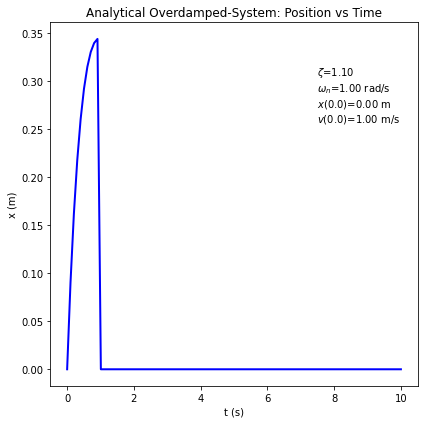

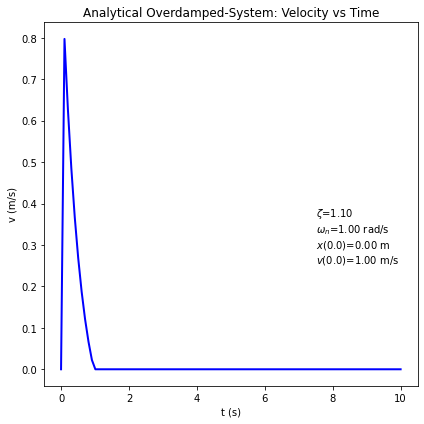

In [1]:
#Analytical Over-Damped Function 
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 

#Conditions of the function 
zeta = 1.1
omega_n = 1.0
v0 = 1 
x0 = 0 
ti = 0.
tf = 10.
t = np.linspace(ti,tf,100)
#Spacing for the time axis

n = len(t)
x = np.zeros(n)
v = np.zeros(n)
#x and v vectors



for i in range(1,10):
    x[i] = 1.09*exp(-.6417*t[i]) - 1.09*exp(-1.558*t[i])
    v[i] = -0.699*exp(-.6417*t[i]) + 1.7*exp(-1.558*t[i])
    
#Solutions of the Differential Spring-Damper Equation
    

#Position Plot 
fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Overdamped-System: Position vs Time")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#Velocity PLot 
fig = plt.figure(figsize=(6,6))
plt.plot(t,v,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Overdamped-System: Velocity vs Time")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.tight_layout()
plt.show()









                                                    Analytical underdamped Case

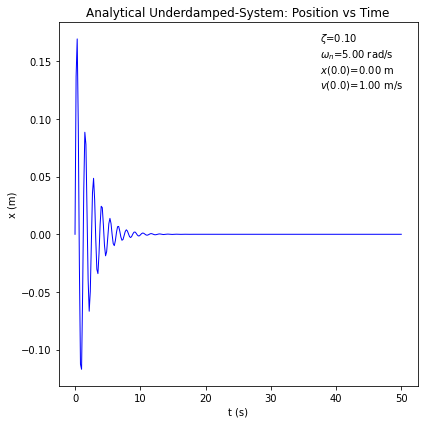

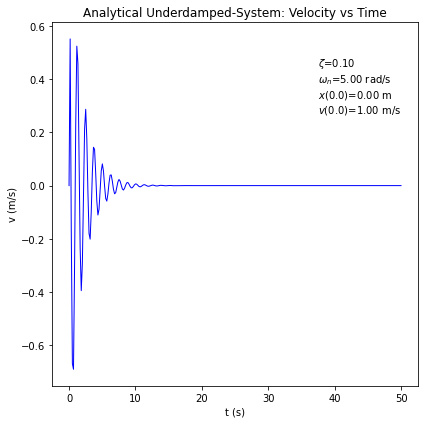

In [27]:
#Analytical Over-Damped Function 
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 

#Condions of ODE 
zeta = 0.1
omega_n = 5
v0 = 1 
x0 = 0 
ti = 0.0
tf = 50.0
t = np.linspace(ti,tf,300)
# time axis vector
n = len(t)
x = np.zeros(n)
v = np.zeros(n)
# x and v vectors



for i in range(1,300):
    x[i] = .201*exp(-0.5*t[i])*sin(4.975*t[i])
    v[i] = .201*(-0.5*exp(-0.5*t[i])*sin(4.975*t[i]) + 4.975*exp(-0.5*t[i])*cos(4.975*t[i]))
    
#Solutions of Differential Equation


#Position Plot 
fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="1.0")
plt.title("Analytical Underdamped-System: Position vs Time")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.75*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#velocity Plot 
fig = plt.figure(figsize=(6,6))
plt.plot(t,v,label="x vs. t",color="b",linewidth="1.0")
plt.title("Analytical Underdamped-System: Velocity vs Time")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.50*max(v)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.tight_layout()
plt.show()


                                                                 Analytical: Critically-damped

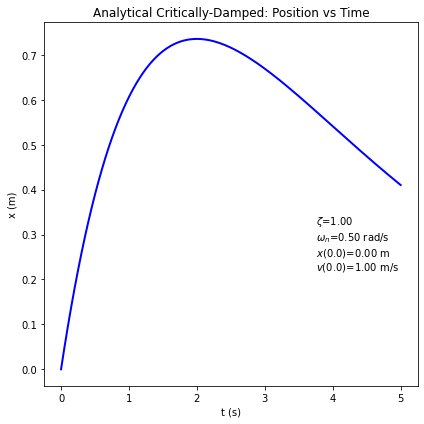

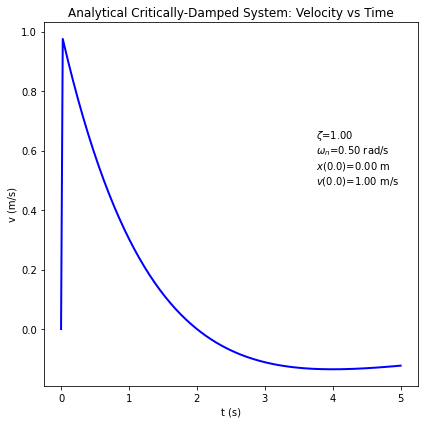

In [2]:
#Analytical Over-Damped Function 
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 

#Conditions of ODE 
zeta = 1.0
omega_n = 0.5
v0 = 1 
x0 = 0 
ti = 0.0
tf = 5.0
t = np.linspace(ti,tf,200)
#Time Axis 
n = len(t)
x = np.zeros(n)
v = np.zeros(n)
#x and v vectors



for i in range(1,200):
    x[i] = t[i]*exp(-0.5*t[i])
    v[i] = exp(-0.5*t[i]) - (t[i]/2)*exp(-0.5*t[i])
#Solutions of Sprng_Damper equation    
    

#Position plot
fig = plt.figure(figsize=(6,6))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Critically-Damped: Position vs Time")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.30*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#Velocity plot 
fig = plt.figure(figsize=(6,6))
plt.plot(t,v,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Critically-Damped System: Velocity vs Time")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.75*tf
txt_loc_y = 0.50*max(v)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.tight_layout()
plt.show()



                                                  Analytical Case 4: F(t)/m = 5 

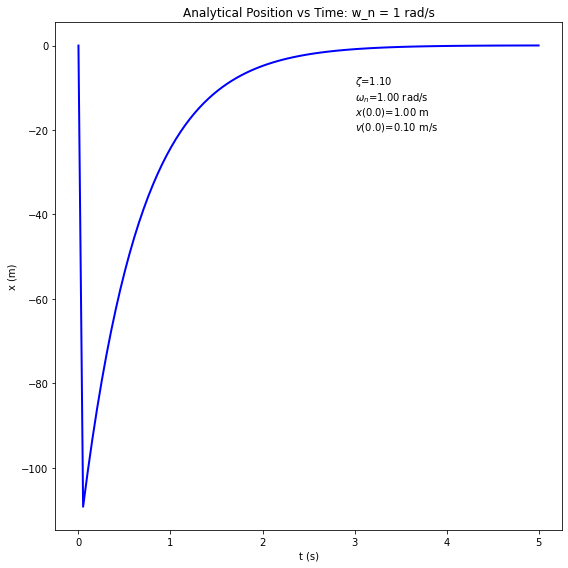

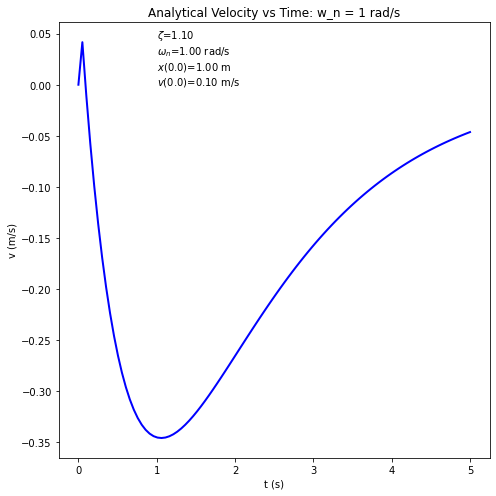

In [3]:
#F(t)/ m = 5
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 

#Condition of ODE 
zeta = 1.1
omega_n = 1.0
v0 = 0.1
x0 = 1
ti = 0.0
tf = 5.0
t = np.linspace(ti,tf,100)
#Time axis
n = len(t)
x = np.zeros(n)
v = np.zeros(n)
# x and v axis 



for i in range(1,100):
     x[i] = 1.809*exp(-.6417*t[i]) - 0.809*exp(-1.558*t[i] + 5)
     v[i] = -1.16*exp(-.6417*t[i]) + 1.26*exp(-1.558*t[i])
#Solution of Spring-mass-damper equation
    
#Position plot 
fig = plt.figure(figsize=(8,8))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Position vs Time: w_n = 1 rad/s")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 3
txt_loc_y = -20
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()

#Velocity plot 
fig = plt.figure(figsize=(7,7))
plt.plot(t,v,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Velocity vs Time: w_n = 1 rad/s")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = 0.20*tf
txt_loc_y = 0.00005
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.tight_layout()
plt.show()


                                                           Analytical Case: F(t)/m = 5t 

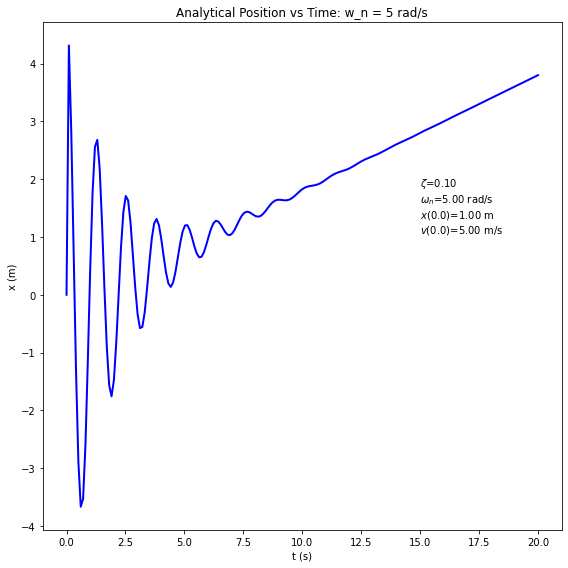

In [19]:
#F(t)/ m = 5t
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 

#Conditions of ODE 
zeta = 0.1
omega_n = 5.0
v0 = 5
x0 = 1
ti = 0.0
tf = 20.0
t = np.linspace(ti,tf,200)
#Time axis
n = len(t)
x = np.zeros(n)
v = np.zeros(n)
# X and V vectors 


for i in range(1,200):
     x[i] = 5*exp(-0.5*t[i])*cos(4.975*t[i]) + .703517*sin(4.975*t[i])*exp(-0.5*t[i]) + (t[i]/5.0) - (1.0/5.0)
#Solution of Spring-mass-damper equation     
    
#Position plot 
fig = plt.figure(figsize= (8,8))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Position vs Time: w_n = 5 rad/s")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = .75*tf
txt_loc_y =  .25*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()



                                                                  Analytical Case: F(t)/m = 5t^2 + 5t

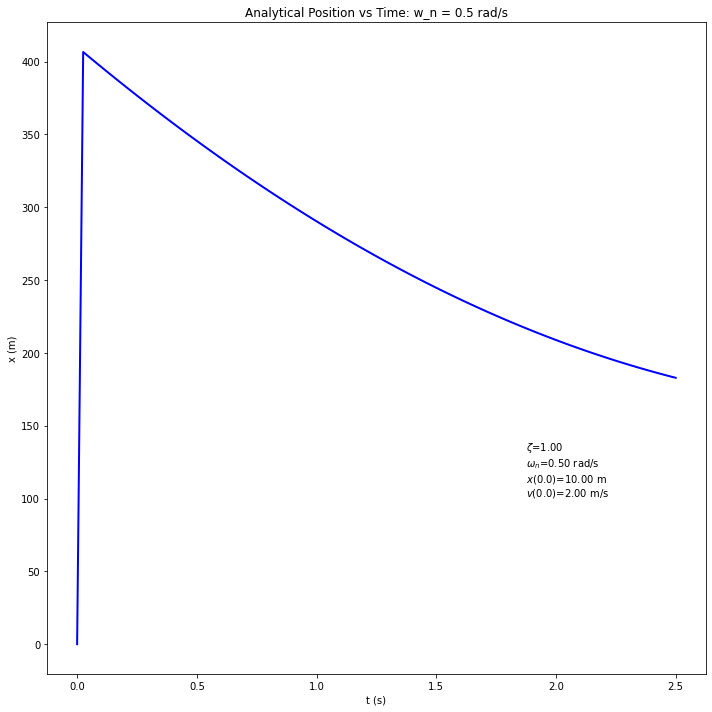

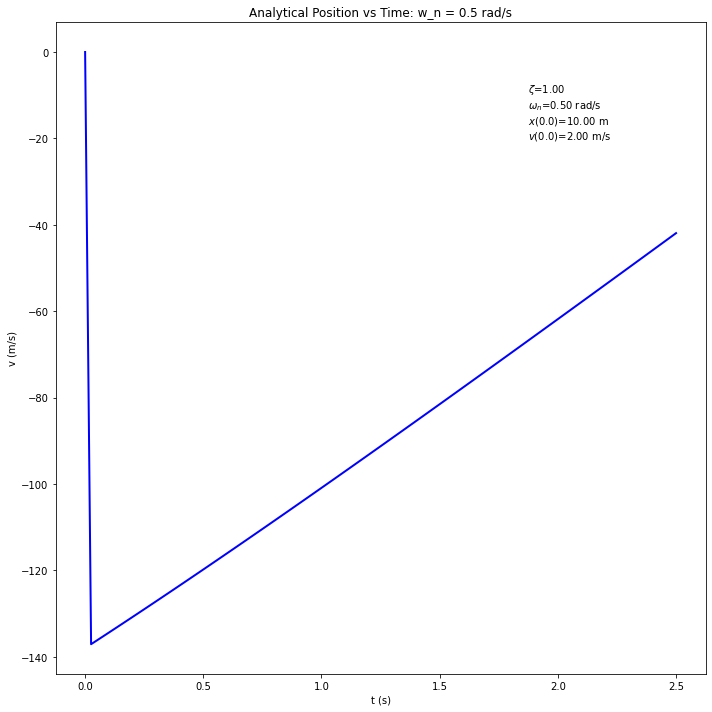

In [40]:
#F(t)/ m = 5t^2 + 5t 
%matplotlib inline 
from math import * 
import numpy as np 
import matplotlib.pyplot as plt 

#Conditions of ODE 
zeta = 1.0
omega_n = 0.5
v0 = 2
x0 = 10
ti = 0.0
tf = 2.5
t = np.linspace(ti,tf,100)
#Time axis
n = len(t)
x = np.zeros(n)
v = np.zeros(n)
# X and V vectors 



for i in range(1,100):
         x[i] = 10.0*exp(-0.5*t[i]) + 7.0*t[i]*exp(-0.5*t[i]) + 20.0*pow(t[i],2) - 140.0*t[i] + 400.0 
         v[i] = -5.0*exp(-0.5*t[i]) + 7.0*(exp(-0.5*t[i]) - (t[i]/2.0)*exp(-0.5*t[i])) + 40.0*t[i] - 140.0
#Solutions of Differential Equation Spring-Damper equation

#Position plot 
fig = plt.figure(figsize= (10,10))
plt.plot(t,x,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Position vs Time: w_n = 0.5 rad/s")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = .75*tf
txt_loc_y =  .25*max(x)
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.tight_layout()
plt.show()


#Velocity Plot 
fig = plt.figure(figsize= (10,10))
plt.plot(t,v,label="x vs. t",color="b",linewidth="2.0")
plt.title("Analytical Position vs Time: w_n = 0.5 rad/s")
omega_n_str = "\omega_n"
zeta_str = "\zeta"
txt_loc_x = .75*tf
txt_loc_y =  -20.0
plt.text(txt_loc_x,txt_loc_y, f"${zeta_str}$={zeta:.2f}\n${omega_n_str}$={omega_n:.2f} rad/s\n$x(${t[0]})={x0:.2f} m\n$v(${t[0]})={v0:.2f} m/s")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.tight_layout()
plt.show()

